In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
RAW_DIRECTORY = Path("../data/raw")

In [3]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Change"] = df["Close"].pct_change()
    df = df[["Date", "Change"]].set_index("Date")
    return df

In [4]:
series = {}
for filepath in RAW_DIRECTORY.iterdir():
    ticker = filepath.stem
    df = pd.read_csv(filepath)
    df = preprocess(df)
    series[ticker] = df["Change"]
final_df = pd.DataFrame(series)
final_df.tail()

,HRL,SLZ,BCI,THD,ROV,ITL,PBG,PGM,MRH,1AT,...,ECH,TRN,CEZ,LRK,SPL,EPR,IPE,CWP,UFC,PBF
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,-0.091703,0.008403,NaN,-0.021875,0.0,-0.007722,NaN,0.00000,0.008475,0.000000,...,0.000000,0.022857,0.011288,NaN,-0.005398,0.004926,0.035144,NaN,NaN,-0.156863
2022-02-01,0.052885,-0.125000,NaN,-0.022364,0.0,-0.062257,NaN,0.00000,0.000000,-0.004762,...,-0.003699,-0.005587,-0.001313,NaN,0.006284,-0.107843,-0.033951,NaN,NaN,-0.023256
2022-02-02,NaN,-0.019048,NaN,-0.026144,0.0,0.041494,0.0,-0.02809,0.000000,0.014354,...,0.004950,-0.002809,-0.011177,NaN,0.028385,0.120879,0.031949,NaN,NaN,0.035714
2022-02-03,NaN,0.203883,NaN,0.033557,0.0,-0.003984,NaN,0.00000,0.000000,NaN,...,NaN,0.000000,NaN,NaN,NaN,0.004902,-0.030960,NaN,NaN,-0.022989
2022-02-04,NaN,0.048387,NaN,0.019481,0.0,0.000000,NaN,0.00000,0.000000,NaN,...,NaN,0.002817,NaN,NaN,NaN,0.004878,0.006390,NaN,NaN,-0.117647


In [5]:
complete_tickers = final_df.columns[~final_df["2020":"2022"].isna().any()]

In [6]:
df = final_df[complete_tickers]["2020":"2022"]
df.head()

,THD,AGT,FOR,ENG,PHR,ARG,ULG,TSG,PZU,IFI,...,SOL,MSZ,SNX,WOJ,B24,KPL,XTP,IMS,MDA,TRN
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.048980,-0.015950,0.096774,0.014124,0.018657,0.022727,0.024598,0.000000,0.031728,0.041707,...,0.019048,0.032609,0.048904,0.031915,0.070000,0.020513,-0.032258,-0.002583,0.053254,0.028241
2020-01-03,0.003891,0.032418,0.000000,0.006964,0.062271,0.000000,-0.010035,0.013793,-0.009686,0.000000,...,0.037383,-0.009357,0.030989,-0.010309,-0.018692,0.000000,-0.004167,-0.033156,-0.011236,-0.017784
2020-01-07,0.000000,-0.028739,-0.003922,-0.003458,-0.034483,0.015556,0.045450,0.061224,-0.009514,0.042855,...,-0.027027,0.024793,-0.010708,0.018750,0.047619,0.000000,0.000000,-0.010548,0.000000,0.013178
2020-01-08,-0.015504,-0.024658,-0.007874,-0.000694,-0.003571,0.039387,-0.007246,-0.051282,-0.020991,-0.008254,...,0.009259,-0.014977,0.004340,-0.016360,-0.059091,-0.005025,-0.046025,0.018669,-0.102273,0.024356
2020-01-09,0.047244,0.000000,0.031746,0.008333,-0.057348,0.036842,0.060856,-0.013514,0.014110,0.008323,...,-0.045872,0.002339,0.067068,0.000000,-0.014493,-0.005051,0.017544,0.010465,0.012658,-0.004784


## Plot of daily returns

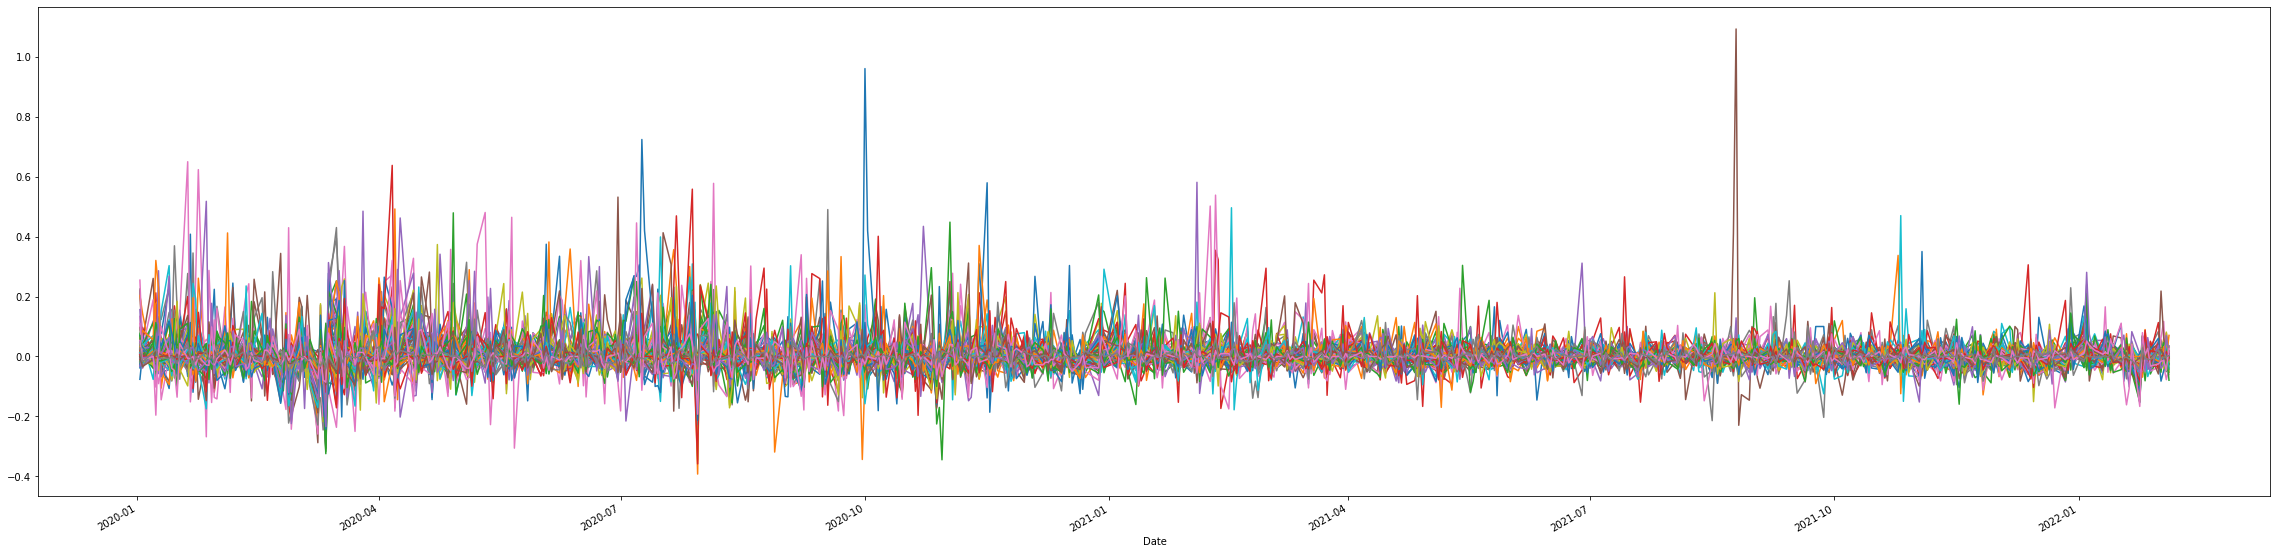

In [7]:
fig, ax = plt.subplots(figsize=(40, 10))
df.plot(ax=ax, legend=False)
plt.show()

## Mean and standard deviation of daily returns

In [8]:
mean_std_df = df.agg(["mean", "var"]).transpose()

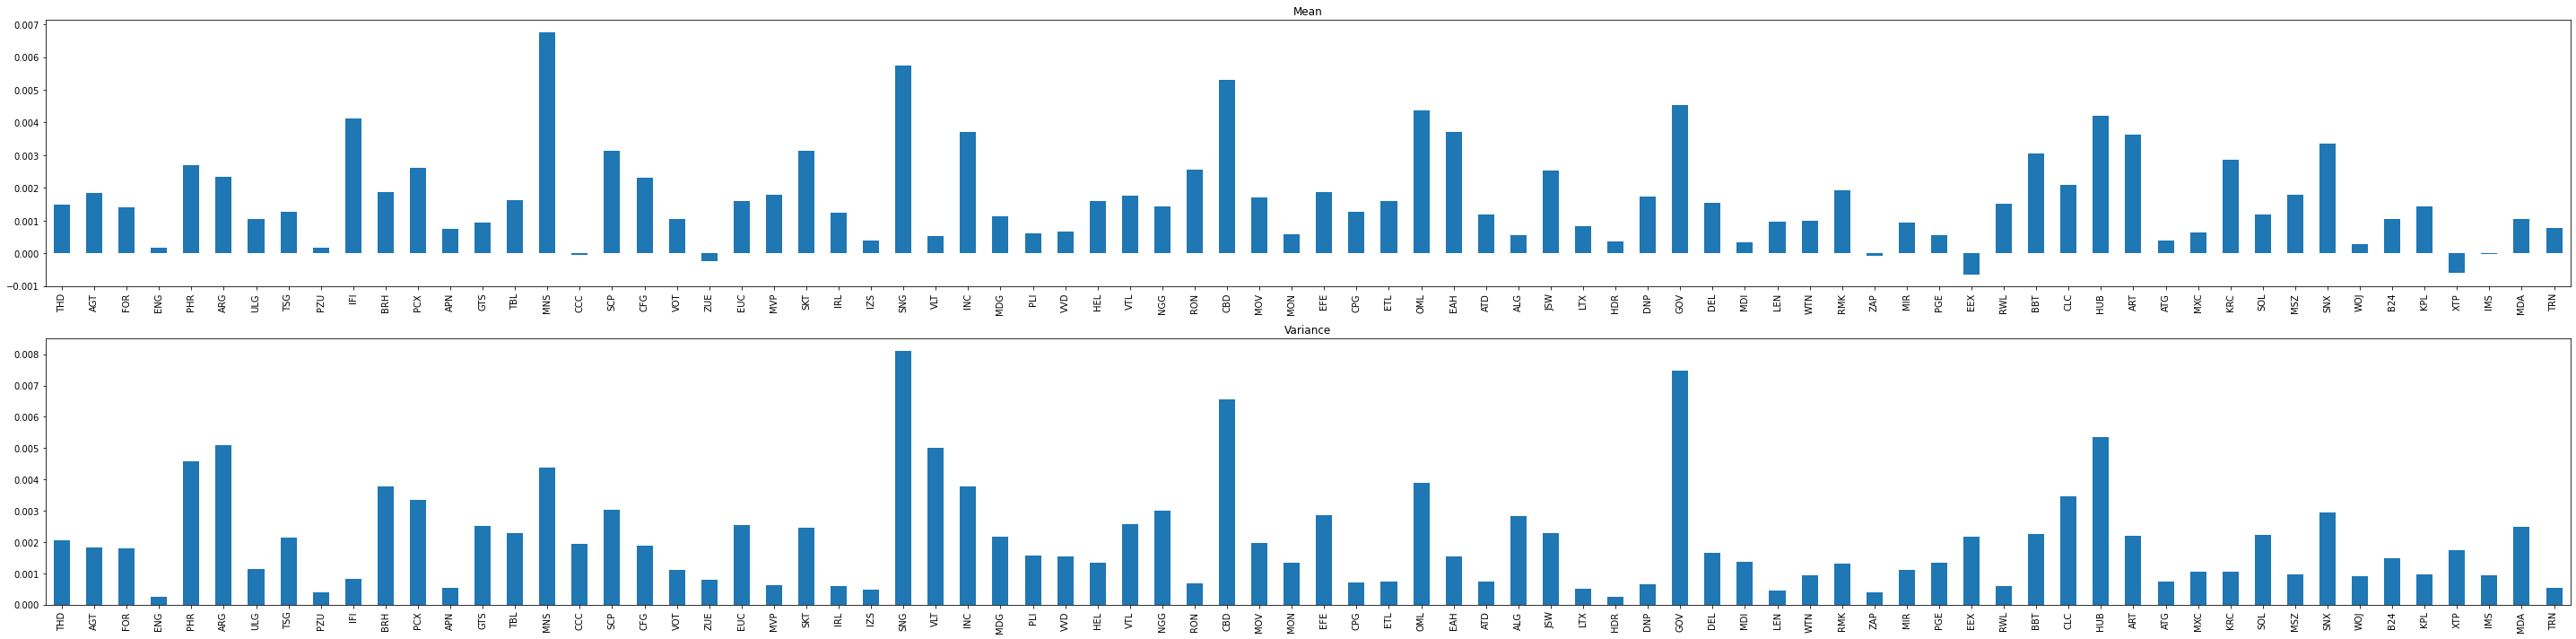

In [9]:
fig, axs = plt.subplots(2, figsize=(40, 10))
mean_std_df["mean"].plot(kind="bar", ax=axs[0], title="Mean")
mean_std_df["var"].plot(kind="bar", ax=axs[1], title="Variance")
fig.tight_layout()
plt.show()

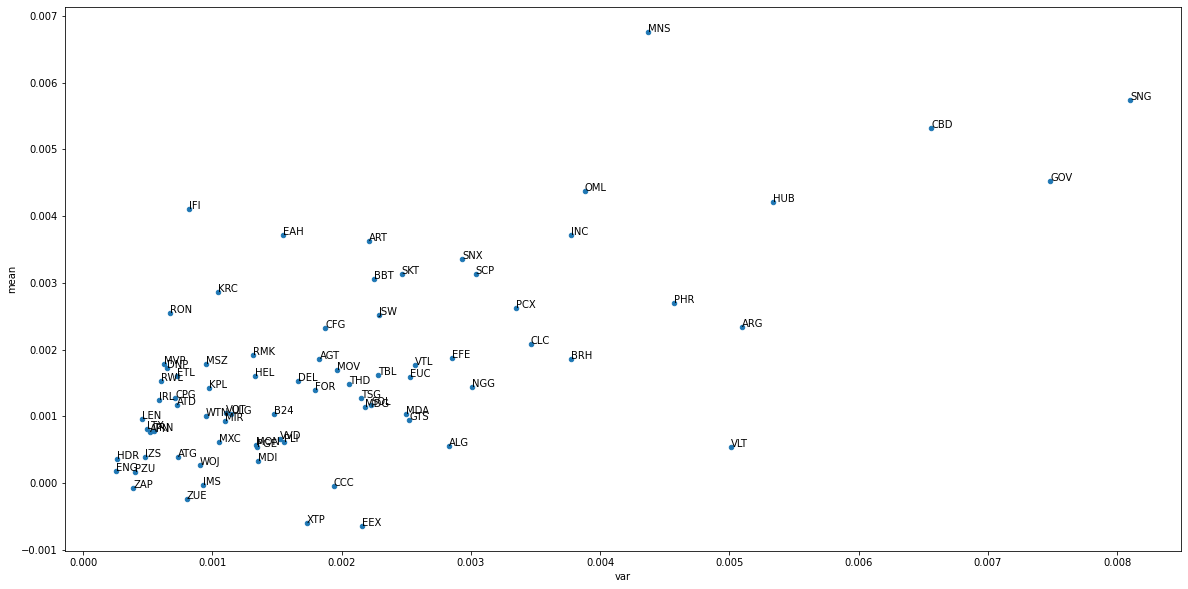

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
mean_std_df.plot("var", "mean", kind="scatter", ax=ax)

for _, row in mean_std_df.iterrows():
    ax.annotate(row.name, (row["var"], row["mean"]))

plt.show()

## Correlation matrix of daily returns

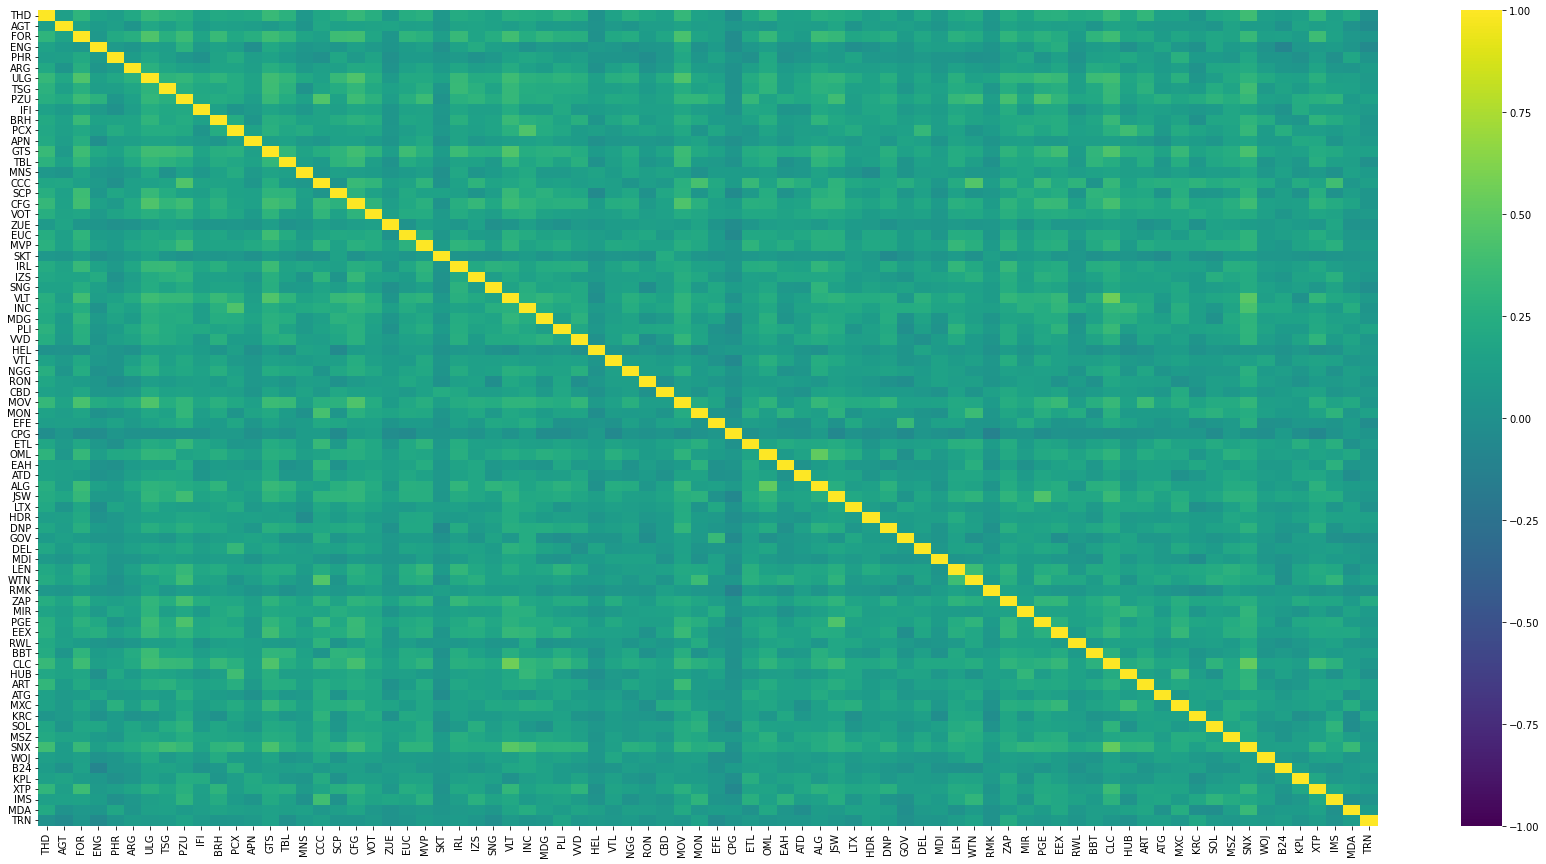

In [11]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(df.corr().round(2), ax=ax, vmin=-1, vmax=1, cmap="viridis")
plt.show()

## Modern portfolio theory

In [12]:
from qpsolvers import solve_qp

In [13]:
SIGMA = df.cov().to_numpy()
R = df.mean().to_numpy()

In [14]:
def get_weights(q):
    return solve_qp(2 * SIGMA, -q * R, None, None, np.ones_like(R), np.ones(1))

def get_nonnegative_weights(q):
    return solve_qp(2 * SIGMA, -q * R, None, None, np.ones_like(R), np.ones(1), np.zeros_like(R))

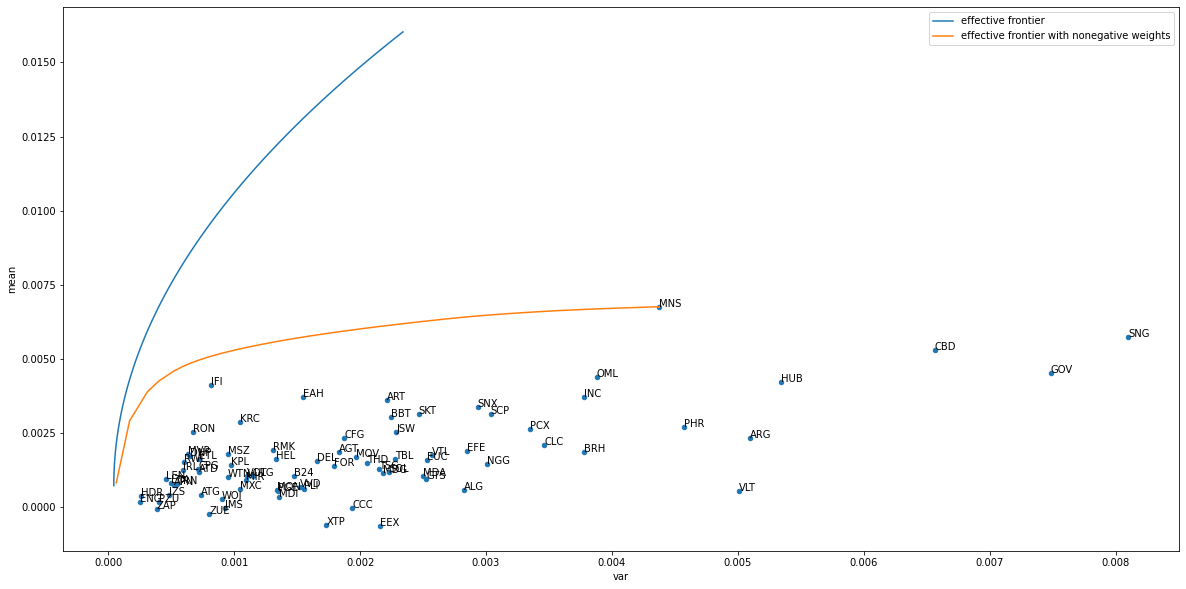

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
mean_std_df.plot("var", "mean", kind="scatter", ax=ax)

for _, row in mean_std_df.iterrows():
    ax.annotate(row.name, (row["var"], row["mean"]))

arr = []
for q in np.linspace(0, 0.3, 100):
    w = get_weights(q)
    vol, ret = w.T @ SIGMA @ w, np.dot(R, w)
    arr.append([vol, ret])

nonneg_arr = []
for q in np.linspace(0, 10, 100):
    w = get_nonnegative_weights(q)
    vol, ret = w.T @ SIGMA @ w, np.dot(R, w)
    nonneg_arr.append([vol, ret])

arr = np.array(arr)
nonneg_arr = np.array(nonneg_arr)
ax.plot(arr[:, 0], arr[:, 1], label="effective frontier")
ax.plot(nonneg_arr[:, 0], nonneg_arr[:, 1], label="effective frontier with nonegative weights")
ax.legend()
plt.show()

# Experiments with NSGA2

In [16]:
from nsga2.objectives import get_objective, portfolios_neg_returns, portfolios_vars, portfolios_empirical_VaR, portfolios_semivariances
from nsga2.model import NSGA2
from nsga2.mutations import PolynomialMutation
from nsga2.crossovers import SBX, PMX

from functools import partial

In [17]:
temp_df = df.agg(["mean"]).T
temp_df["variance"] = portfolios_vars(np.eye(len(df.columns)), SIGMA)
temp_df["semivariance"] = portfolios_semivariances(np.eye(len(df.columns)), np.asarray(df))
temp_df["VaR95"] = portfolios_empirical_VaR(np.eye(len(df.columns)), np.asarray(df), 0.95)
temp_df["VaR99"] = portfolios_empirical_VaR(np.eye(len(df.columns)), np.asarray(df), 0.99)
temp_df.head()

,mean,variance,semivariance,VaR95,VaR99
THD,0.001493,0.002058,0.001618,0.062064,0.138035
AGT,0.001857,0.001829,0.001203,0.060684,0.082305
FOR,0.001393,0.001794,0.001451,0.052893,0.098425
ENG,0.000181,0.000253,0.000122,0.017451,0.034539
PHR,0.002703,0.004574,0.001715,0.067226,0.135420


In [18]:
weights_arr = []
for q in np.linspace(0, 0.2, 10000):
    weights_arr.append(get_weights(q))
weights_arr = np.asarray(weights_arr)

In [19]:
def objective(weights: np.ndarray) -> np.ndarray:
    return np.stack(
        [
            np.maximum(-0.01, portfolios_neg_returns(weights, R=R)),
            portfolios_vars(weights, SIGMA=SIGMA),
            portfolios_semivariances(weights, returns=np.asarray(df)),
            portfolios_empirical_VaR(weights, returns=np.asarray(df), alpha=0.95),
            portfolios_empirical_VaR(weights, returns=np.asarray(df), alpha=0.99),
        ], axis=-1,
    )


In [20]:
def plot(history, start=2, end=None):
    fig, axs = plt.subplots(4, 1, figsize=(40, 10 * 4))
    temp_df.plot("variance", "mean", kind="scatter", ax=axs[0], label="stocks", c="orange", s=50, marker="o")
    temp_df.plot("semivariance", "mean", kind="scatter", ax=axs[1], label="stocks", c="orange", s=50, marker="o")
    temp_df.plot("VaR95", "mean", kind="scatter", ax=axs[2], label="stocks", c="orange", s=50, marker="o")
    temp_df.plot("VaR99", "mean", kind="scatter", ax=axs[3], label="stocks", c="orange", s=50, marker="o")

    end = np.log2(len(history)).astype(int) if end is None else end
    bounds = np.exp2(np.arange(start, end + 2)).astype(int)
    cmap = mpl.cm.get_cmap("viridis")
    norm = mpl.colors.BoundaryNorm(bounds / 1.5, cmap.N)
    idxs = bounds[:-1] - 1

    for obj, ax in zip(range(1, history.shape[-1]), axs):
        c = ax.scatter(history[idxs, :, obj], -history[idxs, :, 0], c=np.broadcast_to(idxs[..., None], (idxs.shape[0], history.shape[1])), cmap=cmap, norm=norm, alpha=0.6)
        fig.colorbar(c, ax=ax, label="iteracja", ticks=idxs+1)

    axs[0].scatter(portfolios_vars(weights_arr, SIGMA), -portfolios_neg_returns(weights_arr, R), label="effective frontier for mean-variance weights", c="r", s=5)
    axs[1].scatter(portfolios_semivariances(weights_arr, np.asarray(df)), -portfolios_neg_returns(weights_arr, R), label="effective frontier for mean-variance weights", c="r", s=5)
    axs[2].scatter(portfolios_empirical_VaR(weights_arr, np.asarray(df), 0.95), -portfolios_neg_returns(weights_arr, R), label="effective frontier for mean-variance weights", c="r", s=5)
    axs[3].scatter(portfolios_empirical_VaR(weights_arr, np.asarray(df), 0.99), -portfolios_neg_returns(weights_arr, R), label="effective frontier for mean-variance weights", c="r", s=5)

    for ax in axs:
        ax.legend()
        ax.set_xscale("log")
    plt.show()

In [33]:
model = NSGA2(len(R), population_size=500, n_iterations=int(2**13), mutation=PolynomialMutation(-1, 1))
history = model.simulate(objective)

100%|██████████| 8192/8192 [18:24<00:00,  7.42it/s] 


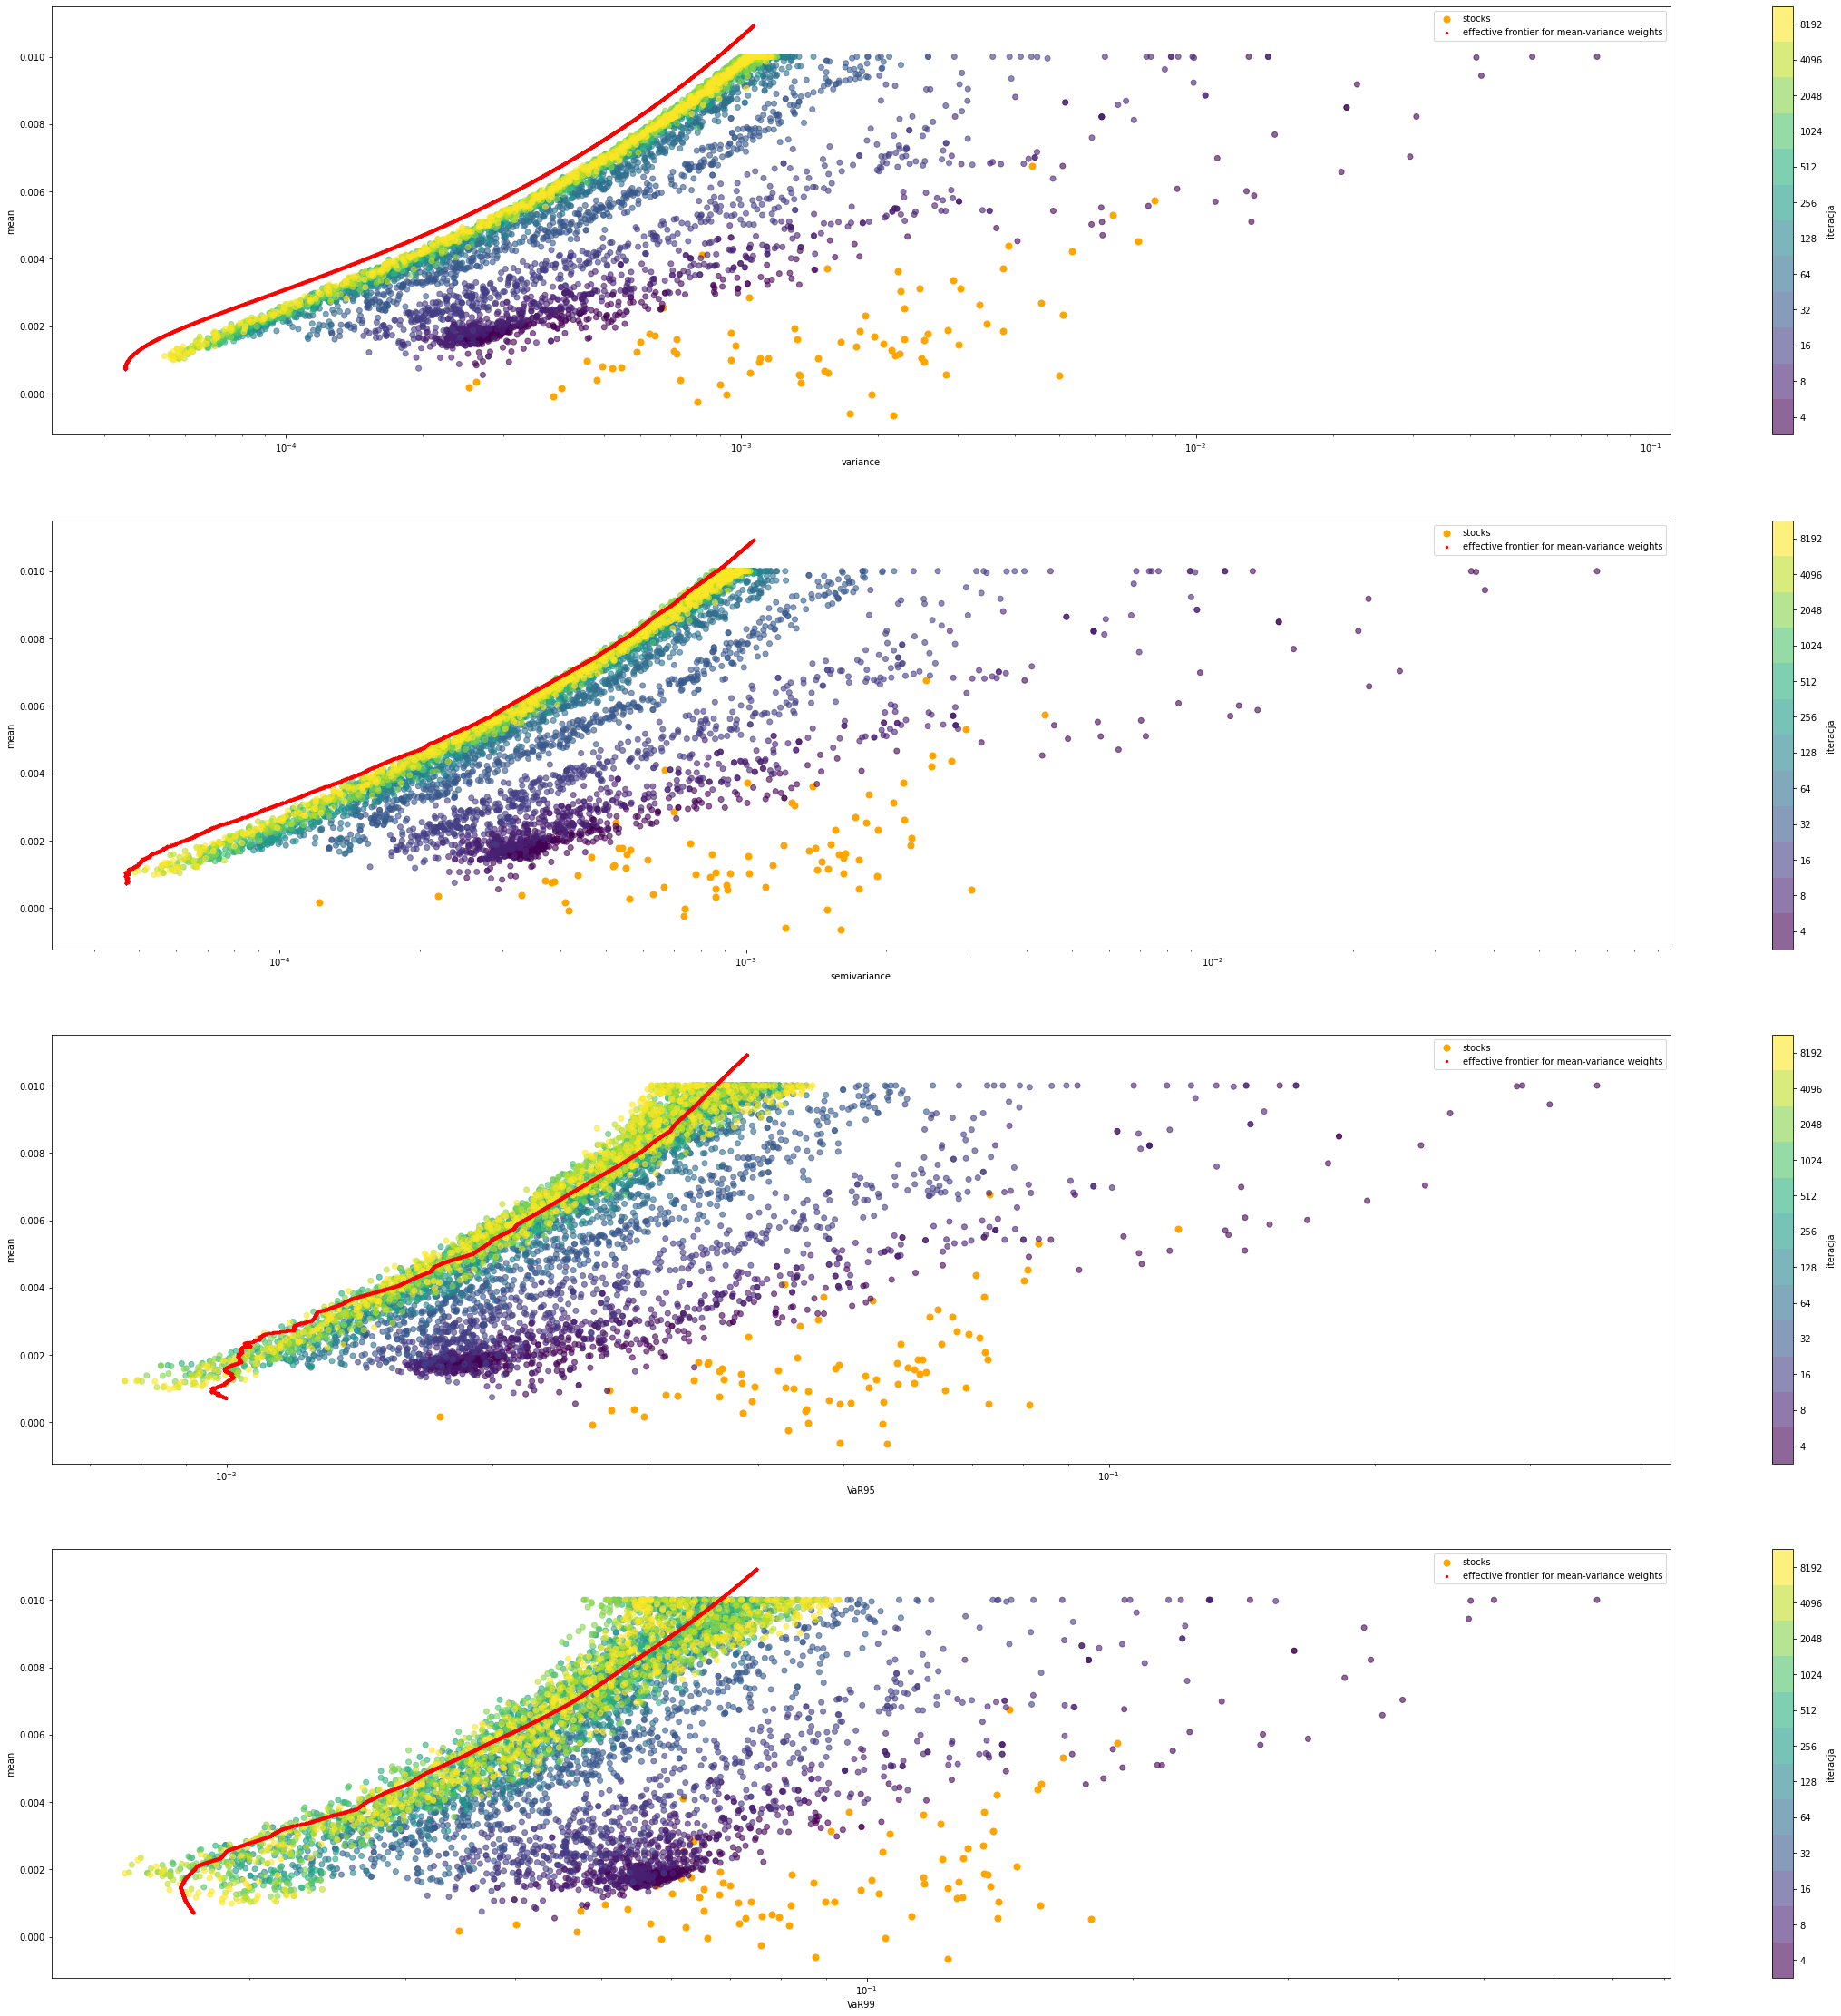

In [34]:
plot(history)